## 1. Импорт библиотек и создание функций

### 1.1. Библиотеки

In [1]:
#! pip install xgboost
#! pip install lightgbm
#! pip install catboost

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier

from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

%config InlineBackend.figure_format = 'svg'

### 1.2. Функции

In [3]:
def conf_matrix(fact, pred):
    conf_test = confusion_matrix(fact, pred, normalize='true')
    sns.heatmap(conf_test, annot=True, fmt='.2f', cmap='binary')
    plt.xlabel('Predicted', size=14)
    plt.ylabel('Actual', size=14)
    plt.show()

## 2. Импорт и предобработка данных

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [7]:
df.shape

(887, 8)

In [8]:
df.drop('Name', axis=1, inplace=True)

In [9]:
target = 'Survived'

In [10]:
data_types = df.dtypes

cat_features = data_types[data_types == 'object'].index.tolist()

In [11]:
num_features = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

num_features = [i for i in num_features if i != target]

## 3. Разбивка и обработка данных

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1), df[target],
    test_size=0.2,
    stratify=df[target],
    random_state=22)

In [13]:
transformer = ColumnTransformer(
    [('cat_trans', OneHotEncoder(), cat_features),
     ('num_trans', MinMaxScaler(), num_features)]
)

In [14]:
X_train = transformer.fit_transform(X_train)

In [15]:
X_test = transformer.transform(X_test)

In [16]:
cat_feature_names = transformer.transformers_[0][1].get_feature_names_out(cat_features).tolist()
num_feature_names = transformer.transformers_[1][1].get_feature_names_out(num_features).tolist()

feature_names = cat_feature_names + num_feature_names

## 4. Классификация с помощью KNN

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_approx = knn.predict(X_train)

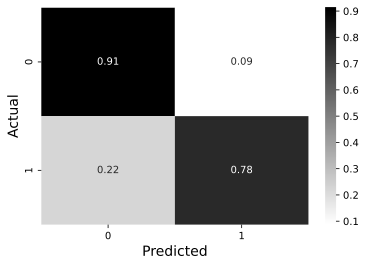

In [20]:
conf_matrix(y_train, y_approx)

In [21]:
knn_train_score = f1_score(y_train, y_approx)
knn_train_score

0.8129770992366412

In [22]:
y_pred = knn.predict(X_test)

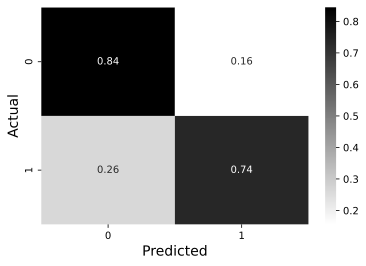

In [23]:
conf_matrix(y_test, y_pred)

In [24]:
knn_test_score = f1_score(y_test, y_pred)
knn_test_score

0.7445255474452556

## 5. Логистическая регрессия

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_approx = lr.predict(X_train)

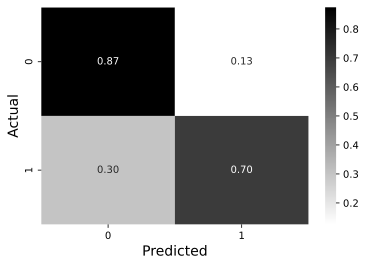

In [28]:
conf_matrix(y_train, y_approx)

In [29]:
lr_train_score = f1_score(y_train, y_approx)
lr_train_score

0.7360308285163776

In [30]:
y_pred = lr.predict(X_test)

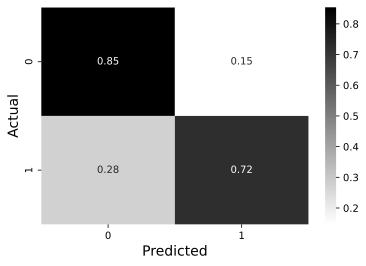

In [31]:
conf_matrix(y_test, y_pred)

In [32]:
lr_test_score = f1_score(y_test, y_pred)
lr_test_score

0.7407407407407408

## 6. Наивный байесовский классификатор

In [33]:
nb = MultinomialNB()

In [34]:
nb.fit(X_train, y_train)

MultinomialNB()

In [35]:
y_approx = nb.predict(X_train)

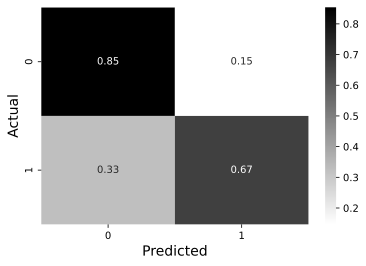

In [36]:
conf_matrix(y_train, y_approx)

In [37]:
nb_train_score = f1_score(y_train, y_approx)
nb_train_score

0.7063339731285988

In [38]:
y_pred = nb.predict(X_test)

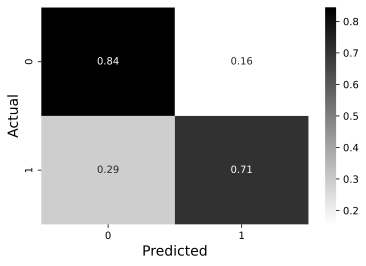

In [39]:
conf_matrix(y_test, y_pred)

In [40]:
nb_test_score = f1_score(y_test, y_pred)
nb_test_score

0.725925925925926

## 7. Метод опорных векторов

In [41]:
svm = SVC()

In [42]:
svm.fit(X_train, y_train)

SVC()

In [43]:
y_approx = svm.predict(X_train)

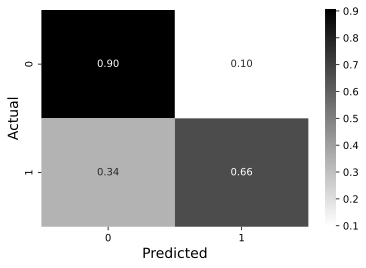

In [44]:
conf_matrix(y_train, y_approx)

In [45]:
svm_train_score = f1_score(y_train, y_approx)
svm_train_score

0.7298387096774194

In [46]:
y_pred = svm.predict(X_test)

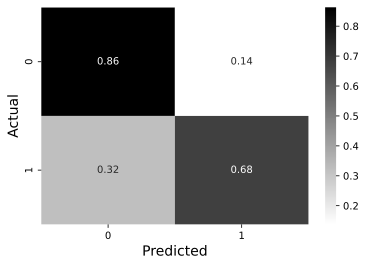

In [47]:
conf_matrix(y_test, y_pred)

In [48]:
svm_test_score = f1_score(y_test, y_pred)
svm_test_score

0.7175572519083969

## 8. Дерево решений

In [49]:
dtc = DecisionTreeClassifier()

In [50]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_approx = dtc.predict(X_train)

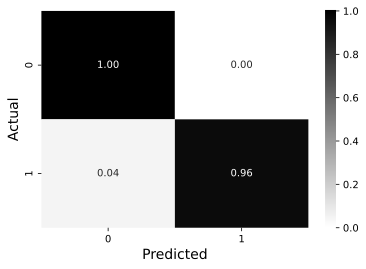

In [52]:
conf_matrix(y_train, y_approx)

In [53]:
dtc_train_score = f1_score(y_train, y_approx)
dtc_train_score

0.9775280898876404

In [54]:
y_pred = dtc.predict(X_test)

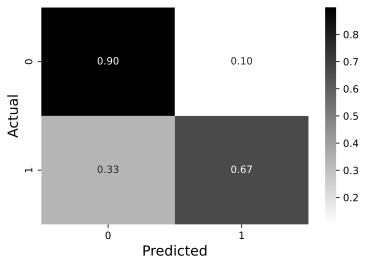

In [55]:
conf_matrix(y_test, y_pred)

In [56]:
dtc_test_score = f1_score(y_test, y_pred)
dtc_test_score

0.7301587301587301

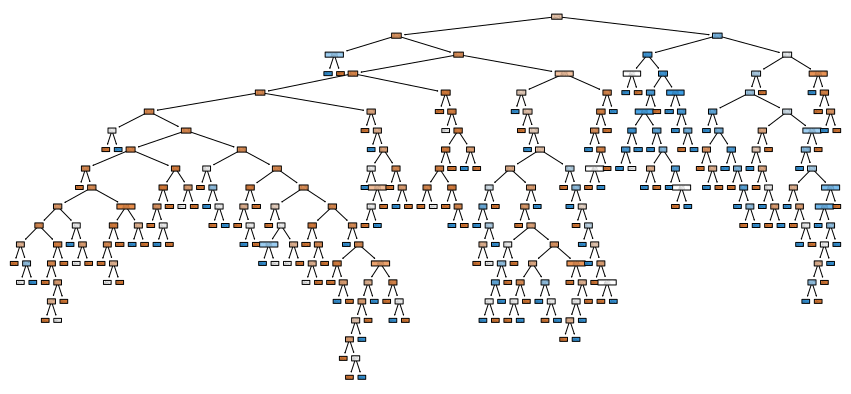

In [57]:
fig = plt.figure(figsize=(15, 7))
tree.plot_tree(dtc, filled=True, feature_names=feature_names)
plt.show()

## 9. Случайный лес

In [58]:
rfc = RandomForestClassifier()

In [59]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_approx = rfc.predict(X_train)

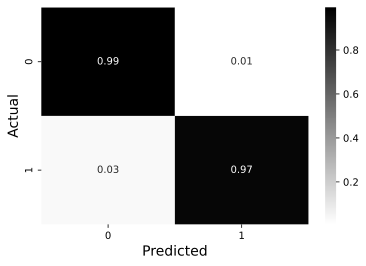

In [61]:
conf_matrix(y_train, y_approx)

In [62]:
rfc_train_score = f1_score(y_train, y_approx)
rfc_train_score

0.9777777777777779

In [63]:
y_pred = rfc.predict(X_test)

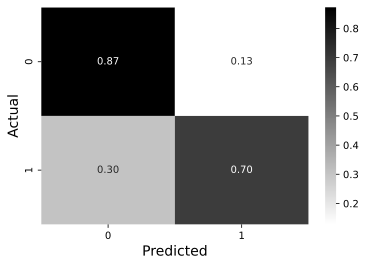

In [64]:
conf_matrix(y_test, y_pred)

In [65]:
rfc_test_score = f1_score(y_test, y_pred)
rfc_test_score

0.732824427480916

## 9. Адаптивный бустинг

In [66]:
abc = AdaBoostClassifier()

In [67]:
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [68]:
y_approx = abc.predict(X_train)

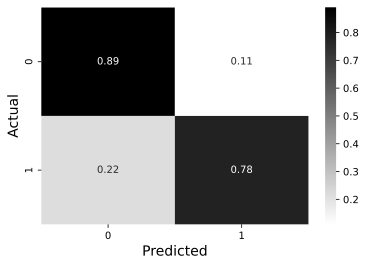

In [69]:
conf_matrix(y_train, y_approx)

In [70]:
abc_train_score = f1_score(y_train, y_approx)
abc_train_score

0.8

In [71]:
y_pred = rfc.predict(X_test)

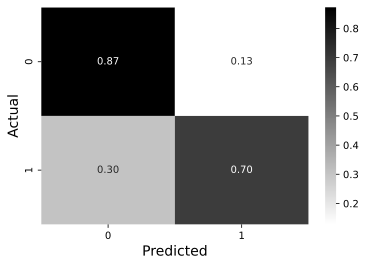

In [72]:
conf_matrix(y_test, y_pred)

In [73]:
abc_test_score = f1_score(y_test, y_pred)
abc_test_score

0.732824427480916

## Сравнение моделей

In [74]:
results = pd.DataFrame(
    {'Train': [knn_train_score, lr_train_score, nb_train_score, svm_train_score,
              dtc_train_score, rfc_train_score, abc_train_score],
    'Test': [knn_test_score, lr_test_score, nb_test_score, svm_test_score,
            dtc_test_score, rfc_test_score, abc_test_score]},
    index=['KNN', 'LogReg', 'NB', 'SVM', 'Tree', 'RF', 'AdaBoost']
)

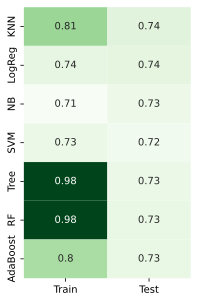

In [75]:
plt.figure(figsize=[3, 5])
sns.heatmap(results, cmap='Greens', annot=True, cbar=False)
plt.show()